✅ Setup Selesai. Semua library siap digunakan.

--- Langkah 1: Memuat Data ---
Silakan unggah file `20191002-reviews.csv` Anda.


Saving 20191002-reviews.csv to 20191002-reviews.csv

✅ File '20191002-reviews.csv' berhasil dimuat.

--- Langkah 2: Pra-pemrosesan Data ---
Info: Kolom 'reviewContent' telah diubah namanya menjadi 'review'.

Jumlah data awal: 203787
Jumlah data setelah menghapus rating yang tidak valid: 203787

Jumlah data sebelum menghapus ulasan kosong/null: 203787
Jumlah data setelah menghapus ulasan kosong/null: 107029

Distribusi rating SETELAH menghapus ulasan kosong:
rating
1     6951
2     2184
3     4372
4    10626
5    82896
Name: count, dtype: int64

Jumlah data setelah menghapus rating netral (3): 102657

Distribusi rating FINAL yang akan diproses (Rating 1, 2, 4, 5):
rating
1     6951
2     2184
4    10626
5    82896
Name: count, dtype: int64


/tmp/ipython-input-1-3011417596.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['rating'] = pd.to_numeric(df_selected['rating'], errors='coerce')
/tmp/ipython-input-1-3011417596.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(subset=['rating'], inplace=True)
/tmp/ipython-input-1-3011417596.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl



    Deskripsi Hasil Proses Pra-pemrosesan Data Teks
Pra-pemrosesan adalah tahap krusial untuk menyiapkan data mentah
agar dapat diolah oleh model machine learning. Berikut adalah
langkah-langkah yang telah dilakukan pada dataset ini:

1.  Pembersihan Data & Filtering:
    ----------------------------
    a. Seleksi Fitur: Hanya kolom 'rating' dan 'review' yang digunakan.
    b. Penanganan Nilai Hilang (Missing Values):
       - Ulasan (review) yang kosong atau berisi teks 'null' telah dihapus.
       - Rating yang tidak valid (bukan angka) juga telah dibuang.
    c. Filtering Rating Netral: Ulasan dengan rating 3 (netral) dihapus
       untuk menciptakan masalah klasifikasi biner yang lebih jelas antara
       sentimen 'Positif' dan 'Negatif'.

2.  Pembuatan Fitur (Feature Engineering):
    -------------------------------------
    - Sebuah kolom baru bernama 'sentiment' dibuat berdasarkan kolom 'rating'.
    - Aturan: Rating 4 atau 5 diberi label 'Positif', sedangkan rating 1
      

,rating,sentiment,review_cleaned
0,5,Positif,bagus mantap dah sesui pesanan
1,4,Positif,bagus sesuai foto
2,5,Positif,okkkkk mantaaaaaaapppp goood
3,4,Positif,bagus sesuai
4,1,Negatif,bima


/tmp/ipython-input-1-3011417596.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df_clean, palette='pastel', order=['Positif', 'Negatif'])


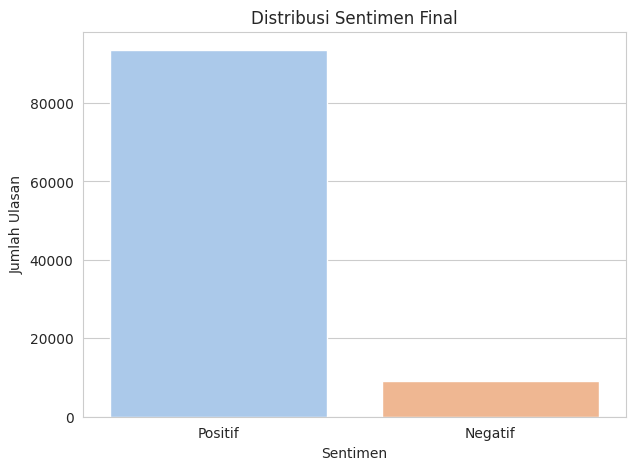


--- Langkah 3: Melatih Model Machine Learning dengan LinearSVC (Versi Cepat) ---

Ukuran data latih: 82125
Ukuran data uji: 20532

⏳ Mencari hyperparameter terbaik untuk LinearSVC...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
✅ Pencarian selesai!

Parameter terbaik ditemukan: {'classifier__C': 1, 'tfidf__ngram_range': (1, 2)}

--- Laporan Evaluasi Model LinearSVC Terbaik (di Data Uji) ---
              precision    recall  f1-score   support

     Negatif       0.96      0.94      0.95      1827
     Positif       0.99      1.00      0.99     18705

    accuracy                           0.99     20532
   macro avg       0.98      0.97      0.97     20532
weighted avg       0.99      0.99      0.99     20532



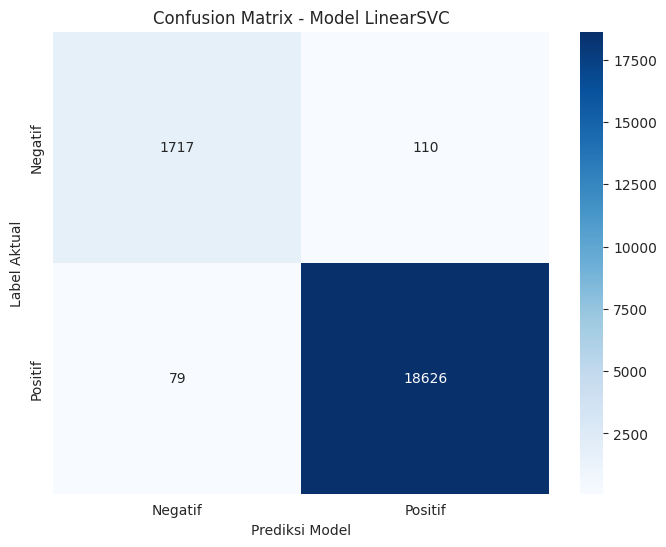

In [1]:
# @title Kode Lengkap: Klasifikasi Sentimen Ulasan Produk (LinearSVC - SVM Versi Cepat) dengan Penjelasan Pra-pemrosesan
# =================================================================================
# Salin dan jalankan seluruh kode ini di satu sel Google Colab.

# -------------------------------------------------------------------
# Langkah 0: Impor Library
# -------------------------------------------------------------------
# Impor library yang dibutuhkan
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC # Mengimpor LinearSVC yang jauh lebih cepat
from sklearn.metrics import classification_report, confusion_matrix

# Mengatur style visualisasi
%matplotlib inline
sns.set_style('whitegrid')

print("✅ Setup Selesai. Semua library siap digunakan.")


# -------------------------------------------------------------------
# Langkah 1: Mengunggah dan Memuat Dataset
# -------------------------------------------------------------------
print("\n--- Langkah 1: Memuat Data ---")
print("Silakan unggah file `20191002-reviews.csv` Anda.")
uploaded = files.upload()

try:
    file_name = next(iter(uploaded))
    df = pd.read_csv(file_name)
    print(f"\n✅ File '{file_name}' berhasil dimuat.")
except Exception as e:
    print(f"\n❌ Terjadi error saat memuat file: {e}")
    df = None # Set df menjadi None jika gagal


# -------------------------------------------------------------------
# Langkah 2: Pra-pemrosesan Data (Lebih Kuat & Informatif)
# -------------------------------------------------------------------
if df is not None:
    print("\n--- Langkah 2: Pra-pemrosesan Data ---")

    # A. Mengganti nama kolom agar lebih mudah digunakan
    if 'reviewContent' in df.columns:
        df.rename(columns={'reviewContent': 'review'}, inplace=True)
        print("Info: Kolom 'reviewContent' telah diubah namanya menjadi 'review'.")

    # B. Memilih kolom yang relevan
    required_cols = ['rating', 'review']
    if all(col in df.columns for col in required_cols):
        df_selected = df[required_cols]

        # C. Menangani tipe data 'rating' dan menghapus nilai yang tidak valid
        print(f"\nJumlah data awal: {len(df_selected)}")
        df_selected['rating'] = pd.to_numeric(df_selected['rating'], errors='coerce')
        df_selected.dropna(subset=['rating'], inplace=True)
        df_selected['rating'] = df_selected['rating'].astype(int)
        print(f"Jumlah data setelah menghapus rating yang tidak valid: {len(df_selected)}")

        # D. Menangani ulasan kosong: Mengganti teks 'null' menjadi nilai kosong (NaN) lalu menghapusnya
        print(f"\nJumlah data sebelum menghapus ulasan kosong/null: {len(df_selected)}")
        df_selected['review'].replace('null', np.nan, inplace=True)
        df_clean = df_selected.dropna(subset=['review']).copy()
        print(f"Jumlah data setelah menghapus ulasan kosong/null: {len(df_clean)}")
        print("\nDistribusi rating SETELAH menghapus ulasan kosong:")
        print(df_clean['rating'].value_counts().sort_index())

        # E. Memfilter data: menghapus rating netral (rating 3)
        df_clean = df_clean[df_clean['rating'] != 3].reset_index(drop=True)
        print(f"\nJumlah data setelah menghapus rating netral (3): {len(df_clean)}")
        print("\nDistribusi rating FINAL yang akan diproses (Rating 1, 2, 4, 5):")
        print(df_clean['rating'].value_counts().sort_index())

        # F. Membuat kolom 'sentiment' berdasarkan 'rating'
        df_clean['sentiment'] = df_clean['rating'].apply(lambda x: 'Positif' if x >= 4 else 'Negatif')

        # G. Fungsi untuk membersihkan teks
        def clean_text(text):
            if not isinstance(text, str):
                return ""
            text = text.lower() # Case folding
            text = re.sub(r'https?://\S+|www\.\S+', '', text) # Hapus URL
            text = re.sub(r'<.*?>+', '', text) # Hapus HTML tags
            text = re.sub(r'[^a-z\s]', '', text) # Hapus karakter non-alfabet
            text = re.sub(r'\s+', ' ', text).strip() # Normalisasi spasi
            return text

        # H. Menerapkan pembersihan teks
        df_clean['review_cleaned'] = df_clean['review'].apply(clean_text)

        # =================================================================================
        # >>>>>>>> HASIL PROSES PREPROCESSING BERUPA TEKS <<<<<<<<
        # =================================================================================
        print("\n\n============================================================")
        print("    Deskripsi Hasil Proses Pra-pemrosesan Data Teks")
        print("============================================================")
        print("Pra-pemrosesan adalah tahap krusial untuk menyiapkan data mentah")
        print("agar dapat diolah oleh model machine learning. Berikut adalah")
        print("langkah-langkah yang telah dilakukan pada dataset ini:\n")

        print("1.  Pembersihan Data & Filtering:")
        print("    ----------------------------")
        print("    a. Seleksi Fitur: Hanya kolom 'rating' dan 'review' yang digunakan.")
        print("    b. Penanganan Nilai Hilang (Missing Values):")
        print("       - Ulasan (review) yang kosong atau berisi teks 'null' telah dihapus.")
        print("       - Rating yang tidak valid (bukan angka) juga telah dibuang.")
        print("    c. Filtering Rating Netral: Ulasan dengan rating 3 (netral) dihapus")
        print("       untuk menciptakan masalah klasifikasi biner yang lebih jelas antara")
        print("       sentimen 'Positif' dan 'Negatif'.\n")

        print("2.  Pembuatan Fitur (Feature Engineering):")
        print("    -------------------------------------")
        print("    - Sebuah kolom baru bernama 'sentiment' dibuat berdasarkan kolom 'rating'.")
        print("    - Aturan: Rating 4 atau 5 diberi label 'Positif', sedangkan rating 1")
        print("      atau 2 diberi label 'Negatif'. Ini mengubah masalah rating menjadi")
        print("      klasifikasi sentimen yang dapat dipahami model.\n")

        print("3.  Pembersihan Teks (Text Cleaning):")
        print("    ---------------------------------")
        print("    Setiap ulasan dalam kolom 'review' dibersihkan melalui beberapa tahap:")
        print("    a. Case Folding: Semua huruf diubah menjadi huruf kecil (lowercase)")
        print("       untuk memastikan kata seperti 'Bagus' dan 'bagus' dianggap sama.")
        print("    b. Menghapus URL & Tag HTML: Tautan web (http://...) dan tag HTML (<...>)")
        print("       dihapus karena tidak mengandung informasi sentimen.")
        print("    c. Menghapus Karakter Tidak Penting: Angka, tanda baca, dan simbol")
        print("       lainnya dihapus, hanya menyisakan huruf dan spasi.")
        print("    d. Normalisasi Spasi: Spasi ganda atau lebih diubah menjadi spasi tunggal")
        print("       untuk merapikan teks.\n")

        print("4.  Vektorisasi Teks (TF-IDF):")
        print("    --------------------------")
        print("    - Model machine learning tidak bisa memproses teks secara langsung. Oleh")
        print("      karena itu, teks yang sudah bersih perlu diubah menjadi angka.")
        print("    - Proses ini dilakukan menggunakan 'TfidfVectorizer' di dalam Pipeline.")
        print("    - TF-IDF (Term Frequency-Inverse Document Frequency) mengubah setiap")
        print("      ulasan menjadi vektor angka. Angka ini merepresentasikan seberapa")
        print("      penting sebuah kata dalam ulasan tersebut relatif terhadap seluruh")
        print("      kumpulan data (corpus).\n")

        print("Setelah melalui semua tahap ini, data teks telah siap untuk digunakan")
        print("dalam melatih model klasifikasi sentimen.")
        print("============================================================")
        # =================================================================================

        print("\n✅ Proses pra-pemrosesan selesai.")
        print("\nContoh data yang telah bersih:")
        display(df_clean[['rating', 'sentiment', 'review_cleaned']].head())

        # Visualisasi distribusi sentimen
        plt.figure(figsize=(7, 5))
        sns.countplot(x='sentiment', data=df_clean, palette='pastel', order=['Positif', 'Negatif'])
        plt.title('Distribusi Sentimen Final')
        plt.xlabel('Sentimen')
        plt.ylabel('Jumlah Ulasan')
        plt.show()

        # -------------------------------------------------------------------
        # Langkah 3: Pendekatan Machine Learning (Menggunakan LinearSVC)
        # -------------------------------------------------------------------
        print("\n--- Langkah 3: Melatih Model Machine Learning dengan LinearSVC (Versi Cepat) ---")

        # 1. Mendefinisikan Fitur (X) dan Target (y)
        X = df_clean['review_cleaned']
        y = df_clean['sentiment']

        # 2. Membagi data menjadi data latih dan uji
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        print(f"\nUkuran data latih: {len(X_train)}")
        print(f"Ukuran data uji: {len(X_test)}")

        # 3. Membuat pipeline (Vectorizer + Classifier LinearSVC)
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('classifier', LinearSVC(random_state=42, max_iter=2000)) # Menggunakan LinearSVC
        ])

        # 4. Menentukan parameter untuk diuji dengan GridSearchCV (disederhanakan)
        param_grid = {
            'tfidf__ngram_range': [(1, 1), (1, 2)], # Coba unigram dan bigram
            'classifier__C': [0.1, 1, 10], # Parameter regularisasi untuk SVM
        }

        # 5. Mencari parameter terbaik
        grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
        print("\n⏳ Mencari hyperparameter terbaik untuk LinearSVC...")
        grid_search.fit(X_train, y_train)
        print("✅ Pencarian selesai!")
        print("\nParameter terbaik ditemukan:", grid_search.best_params_)

        # 6. Evaluasi model terbaik pada data uji
        print("\n--- Laporan Evaluasi Model LinearSVC Terbaik (di Data Uji) ---")
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        print(classification_report(y_test, y_pred))

        # 7. Visualisasi Confusion Matrix
        cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                      xticklabels=best_model.classes_, yticklabels=best_model.classes_)
        plt.title('Confusion Matrix - Model LinearSVC')
        plt.xlabel('Prediksi Model')
        plt.ylabel('Label Aktual')
        plt.show()
    else:
        print("❌ Gagal melanjutkan. Kolom 'rating' dan/atau 'reviewContent' tidak ditemukan di file.")